In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = pd.read_csv('my_movies.csv')
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [4]:
v_cols = ['V1','V2','V3','V4','V5']
df[v_cols] = df[v_cols].fillna(0)

In [5]:
df
# We can drop columns V1-V5 or columns from 'Sixth Sense' to 'Green Mile'.
# As they are duplicate information of each other.

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,0,0,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,0,0,0,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,0,0,0,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,0,1,1,0,0,0,0,0,1,0,1


In [6]:
df = df.drop(columns=['V1','V2','V3','V4','V5'])

In [7]:
vals = [df['Sixth Sense'].sum(),df['Gladiator'].sum(),df['LOTR1'].sum(),df['Harry Potter1'].sum(),df['Patriot'].sum(),df['LOTR2'].sum(),df['Harry Potter2'].sum(),df['LOTR'].sum(),df['Braveheart'].sum(),df['Green Mile'].sum()]

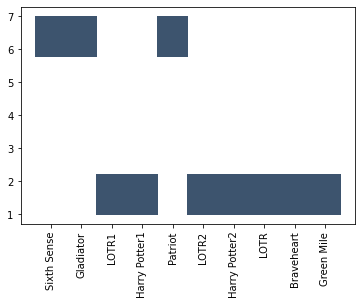

In [8]:
sns.histplot(df,x=df.columns,y=vals)
plt.xticks(rotation=90);

In [9]:
frequent_items = apriori(df,min_support=0.2,use_colnames=True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Sixth Sense, Green Mile)"


In [10]:
rule = association_rules(frequent_items,metric='lift',min_threshold=1,)
rule = rule[rule.lift>1]
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


##### If chances of product in antecedents list being sold is 20% then chances of product in consequents list being sold is atleast 110%.

Text(0.5, 1.0, 'Lift')

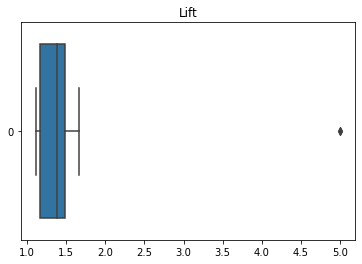

In [11]:
sns.boxplot(data=rule.lift,orient='h')
plt.title('Lift')

In [12]:
rules_1 = rule[rule.lift>2]
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf


In [13]:
frequent_items = apriori(df,min_support=0.5,use_colnames=True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.6,"(Patriot, Gladiator)"


In [14]:
rule = association_rules(frequent_items,metric='lift',min_threshold=1,)
rule.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


##### If the chance of product A(antecedents list) being sold is atleast 50%, then chances of product B(consequents list) being sold rises by around 110% to 140%.